In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('datasets/2000_tracks_features.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6348 entries, 0 to 6347
Data columns (total 35 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6348 non-null   int64  
 1   album              6348 non-null   object 
 2   artists            6348 non-null   object 
 3   available_markets  6348 non-null   object 
 4   disc_number        6348 non-null   int64  
 5   duration_ms_x      6348 non-null   int64  
 6   explicit           6348 non-null   bool   
 7   external_ids       6348 non-null   object 
 8   external_urls      6348 non-null   object 
 9   href               6348 non-null   object 
 10  id                 6348 non-null   object 
 11  is_local           6348 non-null   bool   
 12  name               6348 non-null   object 
 13  popularity         6348 non-null   int64  
 14  preview_url        4459 non-null   object 
 15  track_number       6348 non-null   int64  
 16  type_x             6348 

In [15]:
# Separando valores para analise
df_tests = dict()
df_tests['name'] = df['name']
df_tests['danceability'] = df['danceability']
df_tests['energy'] = df['energy']
df_tests['instrumentalness'] = df['instrumentalness']
df_tests['speechiness'] = df['speechiness']
df_tests['loundness'] = df['loudness']
df_tests = pd.DataFrame(df_tests)

# Drop duplicatas
df_tests = df_tests.drop_duplicates()

df_tests

,name,danceability,energy,instrumentalness,speechiness,loundness
0,Sentinelas,0.737,0.636,0.000000,0.0264,-7.822
25,Clint Eastwood,0.663,0.694,0.000000,0.1710,-8.627
26,Tarde Livre,0.629,0.622,0.000000,0.0292,-9.483
30,Snow (Hey Oh),0.427,0.900,0.000017,0.0499,-3.674
39,Massarrara,0.552,0.910,0.000000,0.1740,-5.812
...,...,...,...,...,...,...
6343,i apologise if you feel something,0.211,0.361,0.028400,0.0346,-10.247
6344,Thunder,0.605,0.822,0.134000,0.0438,-4.833
6345,チンギスハンとヘップバーン,0.507,0.889,0.000000,0.1010,-3.796
6346,Mai tai,0.747,0.775,0.267000,0.1510,-4.682


In [17]:
# Valores mínimos e máximos de energy
print(f"Valor mín: {df_tests['energy'].min()} Valor máx: {df_tests['energy'].max()}")

Valor mín: 0.0231 Valor máx: 0.998


In [35]:
# Separar as classes
bins = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]

# Criar a coluna de classes
df_tests['energy_class'] = pd.cut(df_tests['energy'], bins=bins)

# Criar dataframe com as classes e as músicas
df_energy = df_tests[['name','energy_class']]

# Criar contagem das classes
df_energy = df_energy['energy_class'].value_counts()

df_energy

<class 'pandas.core.series.Series'>
CategoricalIndex: 10 entries, (0.8, 0.9] to (0.0, 0.1]
Series name: count
Non-Null Count  Dtype
--------------  -----
10 non-null     int64
dtypes: int64(1)
memory usage: 550.0 bytes


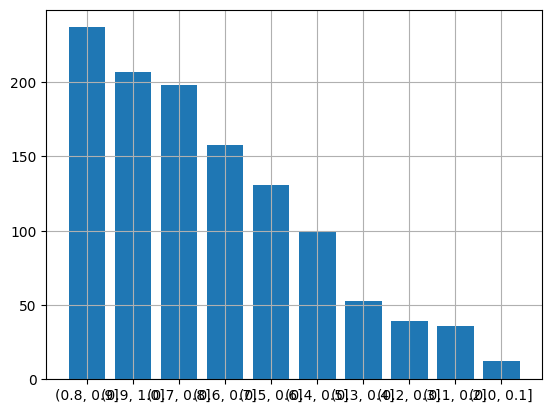

In [46]:
plt.bar(df_energy.index.astype(str), df_energy.values)
plt.grid(True)
plt.show()